# TASK #1: PROJECT OVERVIEW 


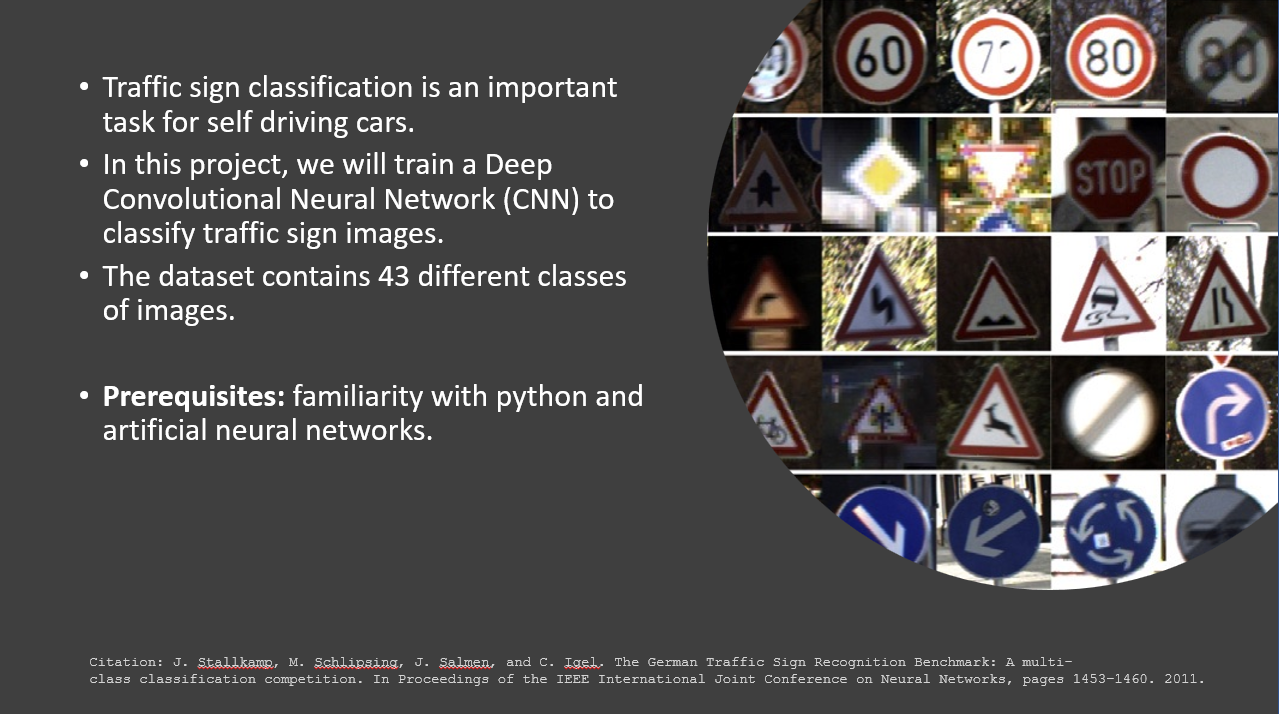

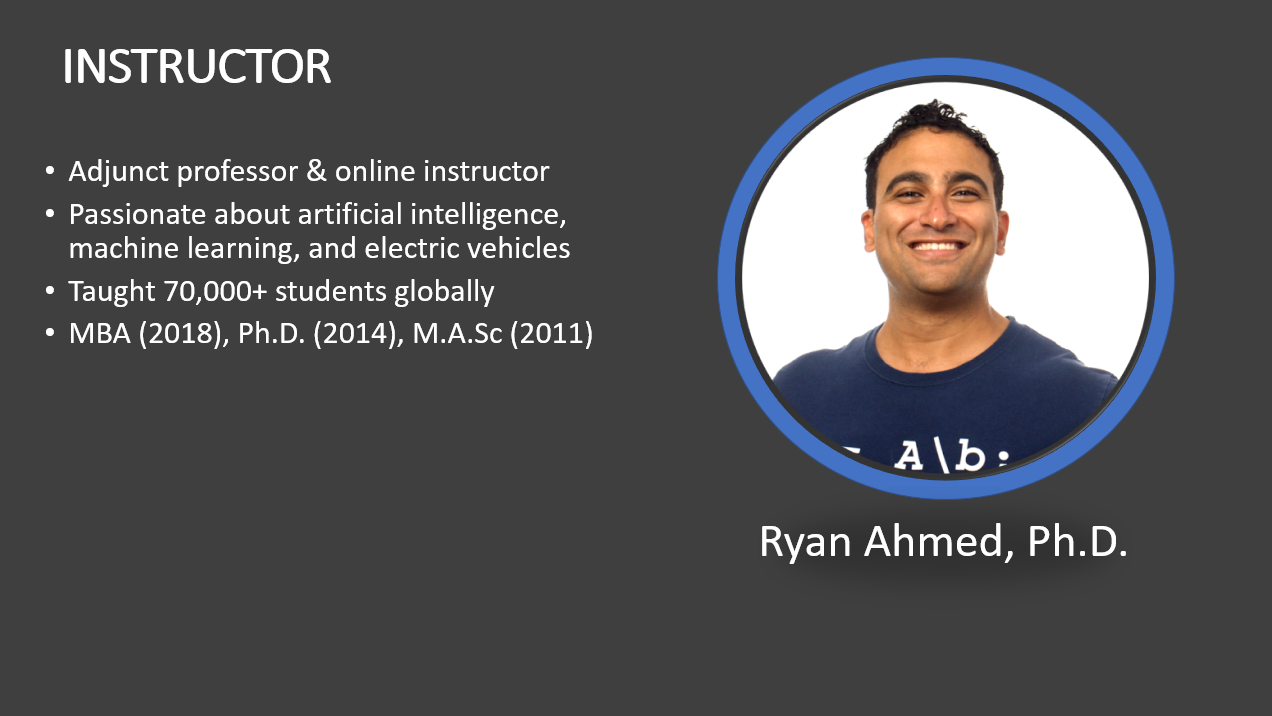

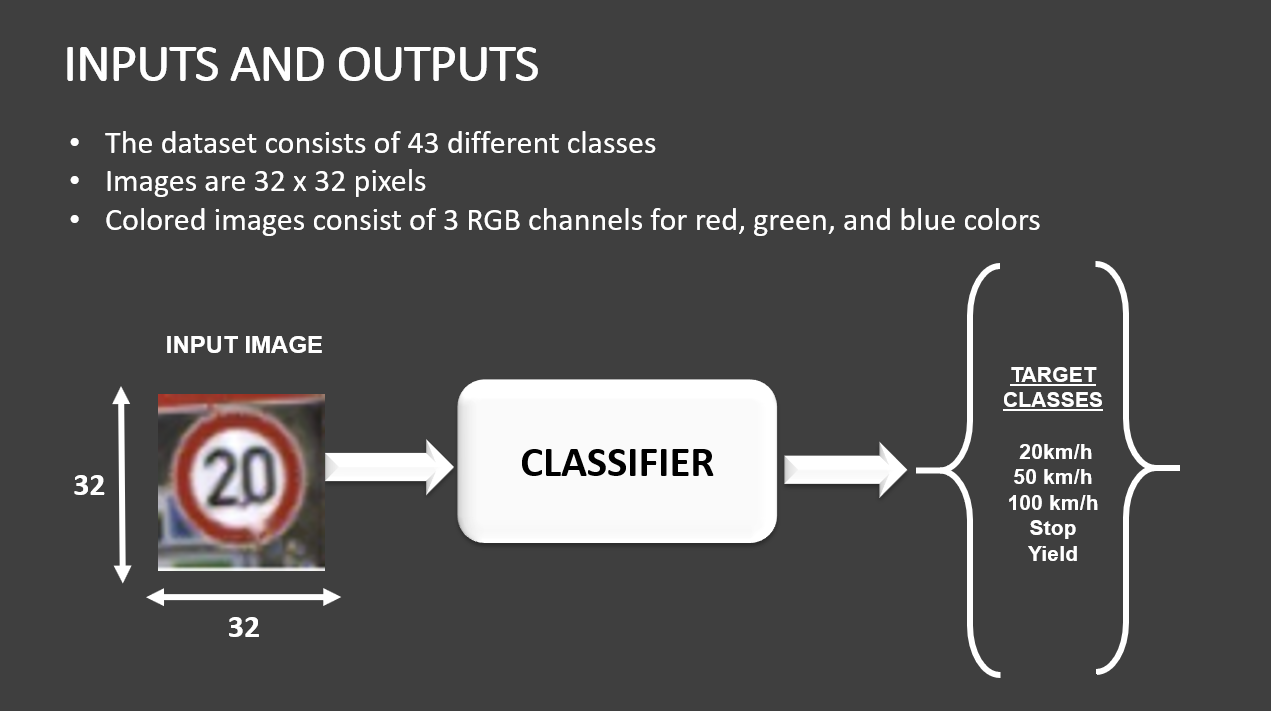

# TASK #2: IMPORT LIBRARIES/DATASETS

In [2]:
import matplotlib.pyplot as plt    # it is used for data visualization 
import numpy as np                 # used for numerical calculation
import tensorflow as tf            # developed by Google Brain Team for building and training machine learning models
import pandas as pd                # data frame manipulation
import seaborn as sns              # data visualization
import pickle                      # is a Python module that provides a way to serialize(converted into stream of byte) and de-serialize Python objects
import random                      # generates random values

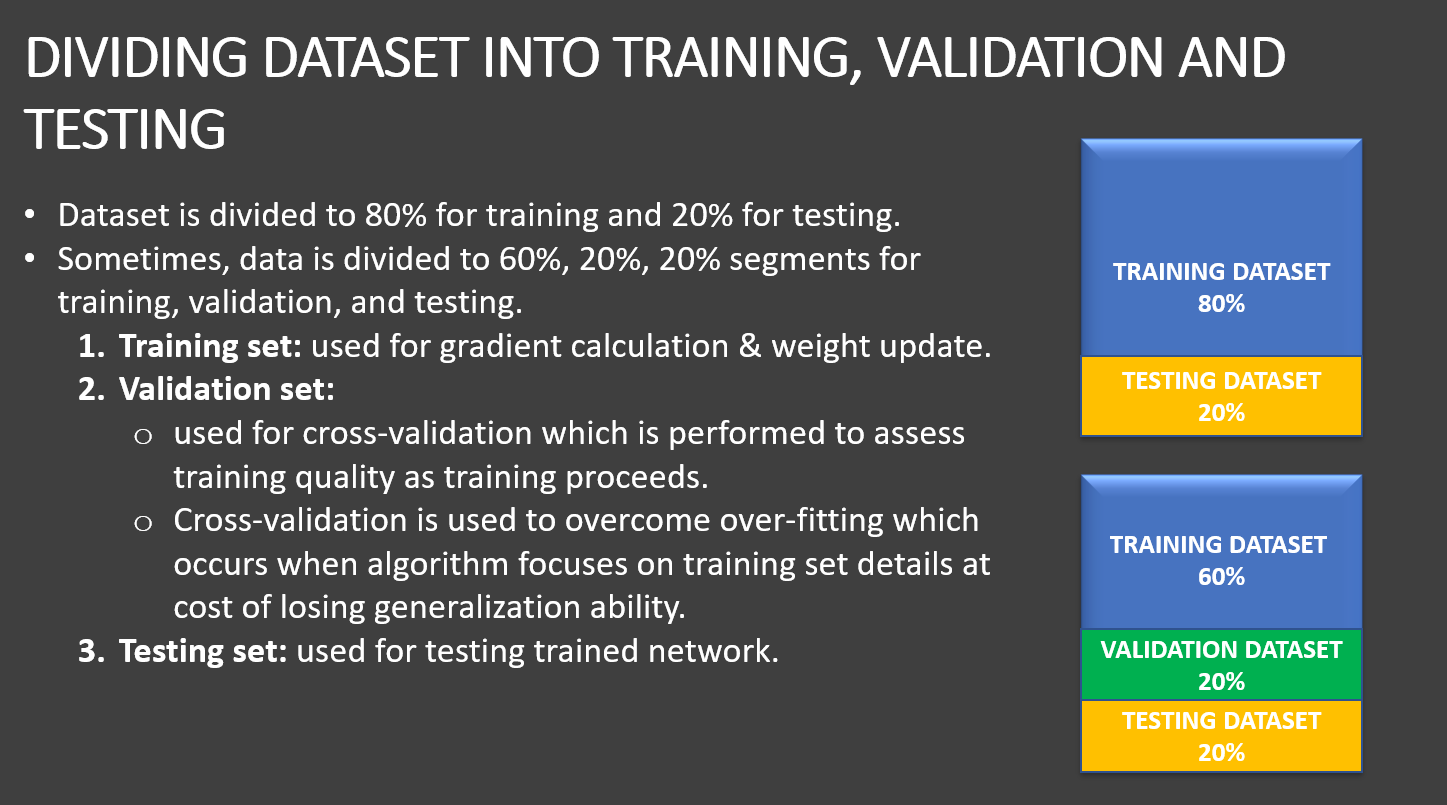

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

## Here's an explanation of above line of code:

**with open("./traffic-signs-data/train.p", mode='rb') as training_data::** This line is opening the train.p pickle file located in the traffic-signs-data directory in read-binary mode ('rb'). The with statement is used to ensure that the file is properly closed after it has been used, and the file object is assigned to the variable training_data.

**train = pickle.load(training_data):** This line is using the pickle.load() method to deserialize the binary data stored in the training_data file object and load it into a Python object. In this case, the data represents the training set of traffic sign images and corresponding labels, which is assigned to the variable train.

similarly for second and third line


In [4]:
x_train,y_train=train['features'],train['labels']

x_valid,y_valid=valid['features'],valid['labels']

x_test,y_test=test['features'],test['labels']

## These lines of code are extracting the features and labels from the loaded training, validation, and testing datasets and storing them into separate variables

**x_train,y_train=train['features'],train['labels'] :-** This line is assigning the training set features to the variable x_train and the training set labels to the variable y_train.**train['features']** is a NumPy array containing the training set traffic sign images, and **train['labels']** is a NumPy array containing the corresponding labels for each image. 

similarly second and third line

In [5]:
x_train.shape

(34799, 32, 32, 3)

## x_train.shape 
**The output (34799, 32, 32, 3) that you got when you ran x_train.shape means that x_train is a NumPy array with four dimensions:**
<ul>
    <li>The first dimension has a size of 34799, which represents the number of training images in the dataset.</li>
    <li>The second dimension has a size of 32, which represents the height of each image in pixels.</li>
    <li>The third dimension also has a size of 32, which represents the width of each image in pixels.</li>
    <li>The fourth dimension has a size of 3, which represents the number of color channels in each image. In this case, the images are RGB color images, so they have three color channels (red, green, and blue).</li>
</ul>
So, in summary, the shape of (34799, 32, 32, 3) indicates that x_train is a NumPy array containing 34799 RGB images with a height of 32 pixels and a width of 32 pixels.

In [6]:
y_train.shape

(34799,)

## y_train.shape 
<ul>
    <li>y_train is a one-dimensional NumPy array with a size of 34799.That contains the labels for each training image</li>
</ul>


# TASK #3: PERFORM IMAGES VISUALIZATION

4

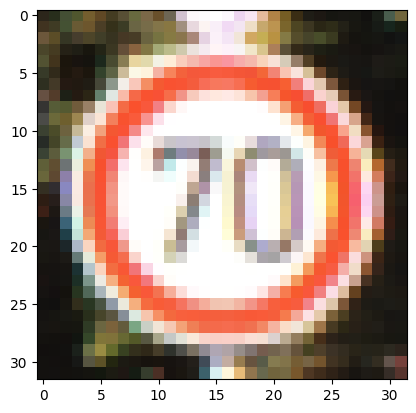

In [7]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

**The code i = np.random.randint(1, len(X_train))** selects a random index i between 1 and the length of X_train. This is done to randomly select one image from the training dataset for visualization purposes.

**The plt.imshow(X_train[i])** line of code displays the selected image.

**y_train[i]** line of code returns the label for the selected image



In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 

W_grid = 5
L_grid = 5

# W_grid = 5 and L_grid = 5 mean that the grid will have 5 columns and 5 rows, for a total of 25 subplots.   
       

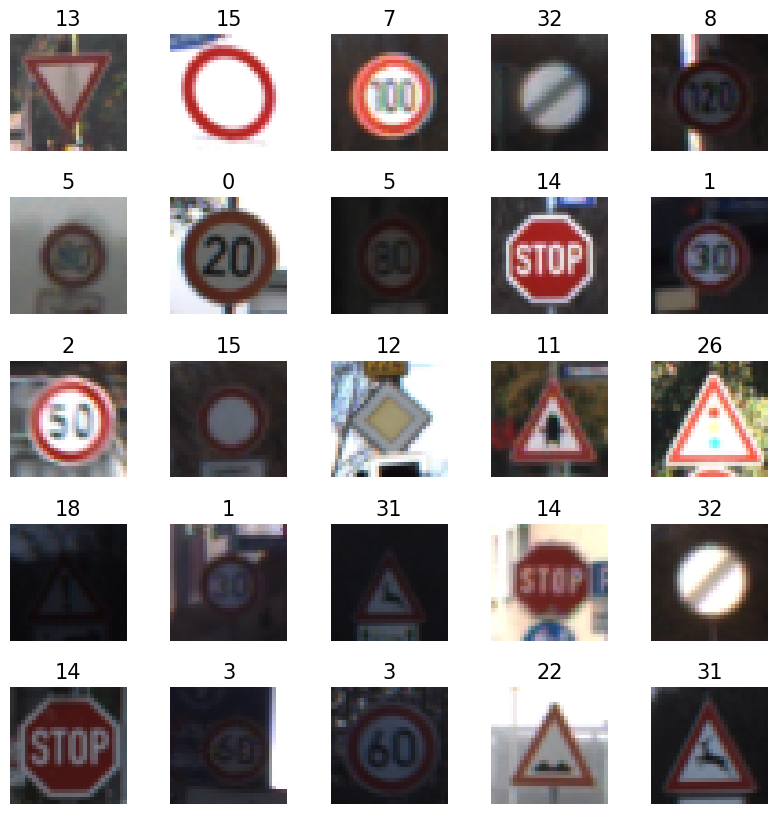

In [9]:
#explanation is given below
#The code is used to visualize a random set of images from the training dataset with their corresponding labels

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10)) 


axes = axes.ravel() # ravel() method flaten the 5 x 5 matrix into 1D array

n_training = len(x_train) 

for i in np.arange(0,W_grid*L_grid):  
    
    #  This line of code randomly selects an index from the training dataset.
    index=np.random.randint(0,n_training)
    
    # read and display an image with the selected index   
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15) 
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

## above is output of above code

**In Matplotlib, a subplot** is a way to create multiple plots in the same figure. Subplots allow you to visualize multiple graphs or images side-by-side or stacked on top of each other within a single figure.

#### fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10)):

<ul>
    <li>This line of code creates a grid of subplots with the specified number of rows (L_grid) and columns (W_grid) and sets           the figure size to 10 x 10 inches. It returns both the fig object and an array of axes objects representing the                 individual subplots.</li>
    <br>
    <li>fig is the figure object that represents the entire figure or window in which the subplots are drawn.
        You can use this object to modify properties of the entire figure, such as its size or title.</li>
        <br>
    <li>axes is an array of subplot objects, where each element of the array corresponds to a single subplot in the grid.You can         use the axes array to modify properties of individual subplots, such as their titles, axis labels, or color</li>

    
</ul>

#### for i in np.arange(0,W_grid*L_grid):
<ul><li>This line of code creates a loop to iterate over each subplot.</li></ul>

#### index=np.random.randint(0,n_training):
<ul><li>This line of code randomly selects an index from the training dataset.</li></ul>


#### axes[i].imshow(x_train[index]):
<ul><li>This line of code displays the image with the selected index in the i-th subplot using the imshow() function..</li></ul>


#### axes[i].set_title(y_train[index],fontsize=15):
<ul><li>This line of code sets the title of the i-th subplot to the corresponding label of the selected image.</li></ul>


#### axes[i].axis('off'): 
<ul><li>This line of code removes the axis lines and labels from the i-th subplot.</li></ul>

#### plt.subplots_adjust(hspace=0.4):
<ul><li>This line of code adjusts the spacing between the subplots.</li></ul>



# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [10]:
from sklearn.utils import shuffle   # sklearn module is present in  "scikit-learn" so install !pip install scikit-learn
x_train, y_train = shuffle(x_train, y_train)

#In machine learning projects, it is often a good practice to shuffle your data before training your model.
#This is to prevent any bias that might arise due to the ordering of the data
#In the above code, X_train and y_train are the training data and labels respectively.
#The shuffle function is used to shuffle the rows of both X_train and y_train in unison.

In [11]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)

**The line of code you provided converts the RGB images in the x_train array to grayscale.**

In more detail, the x_train array has shape (num_samples, height, width, num_channels), where num_samples is the number of images in the training set, height and width are the height and width of each image in pixels, and num_channels is the number of color channels per pixel. For RGB images, num_channels is 3 (for red, green, and blue channels).

The np.sum(x_train/3,axis=3,keepdims=True) code performs the following operations:
<ul>
<li>Divides each pixel value in the x_train array by 3. This is done to convert the pixel values from the range of 0-255 to the range of 0-85. This step is optional, and is done to reduce the computational cost of the subsequent sum operation.</li>
<br>
<li>Calculates the sum of the pixel values along the 4th axis (i.e., the color channel axis), using the np.sum() function. This results in an array of shape (num_samples, height, width, 1), where each pixel value is the sum of the red, green, and blue channels.</li>
<br>
<li>Sets the keepdims parameter to True to ensure that the resulting array has the same number of dimensions as the input array, with a new dimension added for the grayscale channel. This results in an array of shape (num_samples, height, width, 1), where each pixel value is the sum of the red, green, and blue channels, and represents the grayscale intensity of the corresponding pixel.</li>
</ul>

In [12]:
x_train_gray.shape

(34799, 32, 32, 1)

In [13]:
x_train_gray_norms=(x_train_gray-128)/128

In [14]:
x_train_gray_norms

array([[[[ 0.86197917],
         [ 0.95052083],
         [ 0.9921875 ],
         ...,
         [-0.74739583],
         [-0.7578125 ],
         [-0.765625  ]],

        [[ 0.859375  ],
         [ 0.9453125 ],
         [ 0.9921875 ],
         ...,
         [-0.69791667],
         [-0.71614583],
         [-0.734375  ]],

        [[ 0.83072917],
         [ 0.92447917],
         [ 0.9921875 ],
         ...,
         [-0.63541667],
         [-0.65625   ],
         [-0.68489583]],

        ...,

        [[-0.7578125 ],
         [-0.7578125 ],
         [-0.76041667],
         ...,
         [-0.70833333],
         [-0.70052083],
         [-0.71354167]],

        [[-0.76041667],
         [-0.76041667],
         [-0.76041667],
         ...,
         [-0.72135417],
         [-0.72916667],
         [-0.75260417]],

        [[-0.76302083],
         [-0.76041667],
         [-0.75520833],
         ...,
         [-0.7890625 ],
         [-0.79166667],
         [-0.77864583]]],


       [[[-0.01302083],


In [15]:
#now converting RGB image to grayscale and perform normalization for valid and test and explanation is same as ABOVE
x_valid_gray=np.sum(x_valid/3,axis=3,keepdims=True)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)

In [16]:
x_valid_gray_norms=(x_valid_gray-128)/128
x_test_gray_norms=(x_test_gray-128)/128

## The below code  displaying three images using Matplotlib's imshow() function.
<ol>
<li>The first line generates a random integer i between 1 and the length of the x_train_gray array (presumably to display a random image from the training set).</li>
<br>
<li>The second line displays the grayscale version of the image at index i in the x_train_gray array, using Matplotlib's imshow() function. The squeeze() function is used to remove any dimensions with length 1, since the grayscale image has a shape of (height, width, 1).</li>
<br>
<li>The third line displays the original RGB version of the same image at index i in the x_train array, using Matplotlib's imshow() function.</li>
<br>
<li>The fourth line displays the normalized grayscale version of the same image at index i in the x_train_gray_norms array, using Matplotlib's imshow() function.</li>
<br>
<li>The squeeze() function is used to remove any dimensions with length 1, since the normalized grayscale image has a shape of (height, width, 1).</li>
<br>
<li>the cmap parameter can be set to 'gray' to display the image in grayscale. This means that each pixel in the image will be displayed with a shade of gray</li>
</ol>

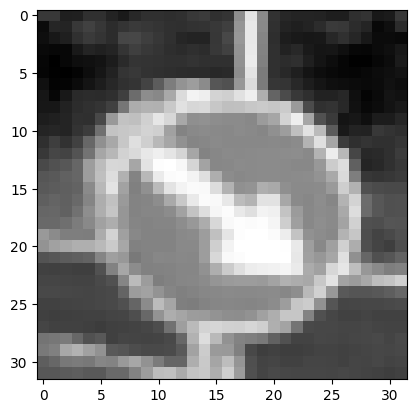

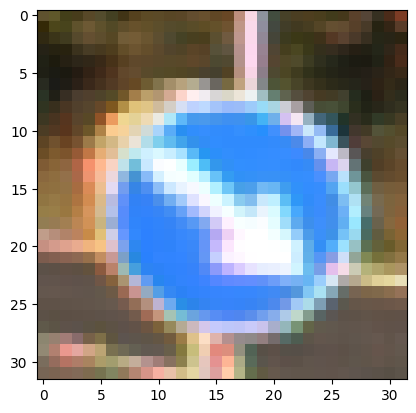

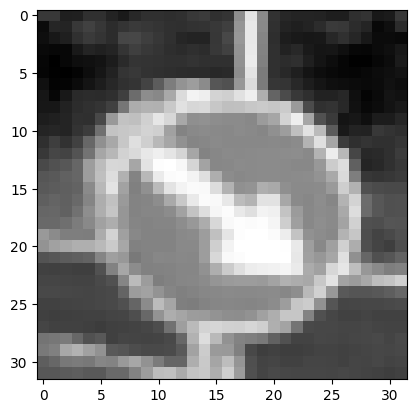

In [17]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')            
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norms[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

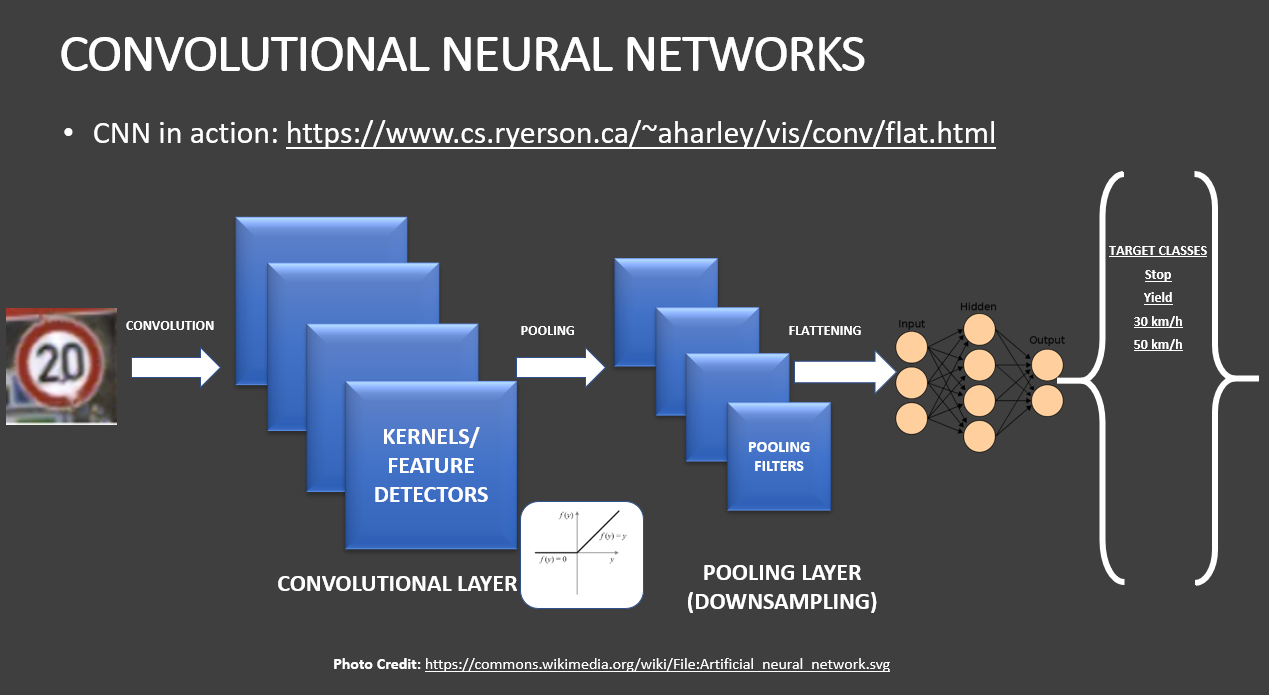

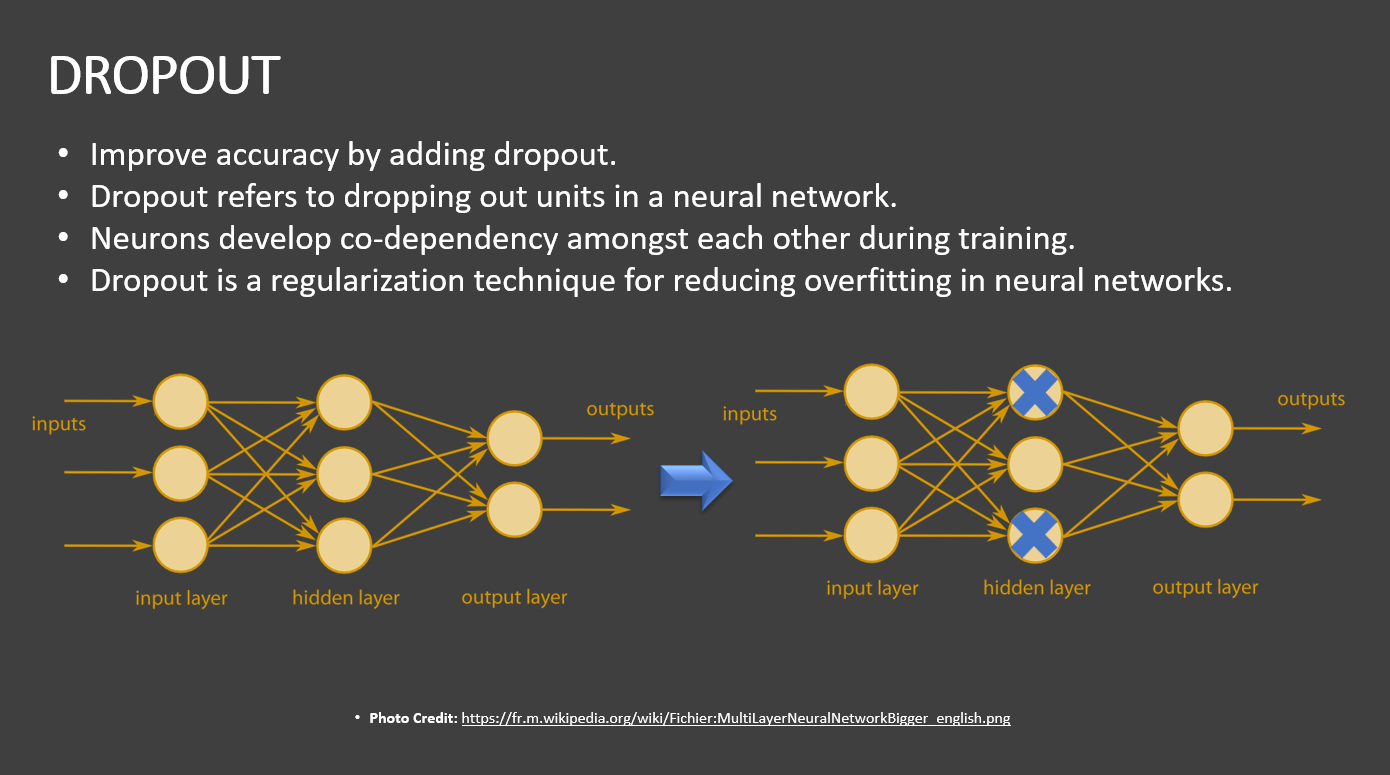

## Visulaize the Convolutional Neural Network (CNN) in 2D

[CLick here](https://adamharley.com/nn_vis/cnn/2d.html)

## Visualize the Convolutional Neural Network (CNN) in 3D

[Click here](https://adamharley.com/nn_vis/cnn/3d.html)

## Original Website

[Click here](https://adamharley.com/nn_vis/#:~:text=Convolutional%20neural%20networks%20are%20at,network%2C%20rather%20than%20the%20behavior.)

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [18]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

## Explantion of above Code

**1) from tensorflow.keras import datasets, layers, models :**
This line imports the required packages from TensorFlow to create the CNN model.

**2) CNN = models.Sequential() :**
This line initializes a sequential model to stack the layers of the CNN in order.

**3) CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1))) AND
CNN.add(layers.AveragePooling2D()) :**
These two lines add a convolutional layer with 6 filters, each with a 5x5 kernel size and a ReLU activation function. The input shape of the images is 32x32 pixels with 1 color channel. The output of this layer is then passed through an average pooling layer that reduces the spatial dimensions of the feature maps.

  ###### OUTPUT => after executing the line CNN.summary()

For the Conv2D layer:

<ol>
<li>The layer has 6 filters of size 5x5, so the number of trainable parameters is
    (filter_height * filter_width * input_channels + 1) * filters = (5 * 5 * 1 + 1) * 6 = 156.</li>
<li>The padding is not specified, so it defaults to 'valid', meaning no padding is added around the input.</li>
<li>The stride is also not specified, so it defaults to (1,1), meaning the filter is moved 1 pixel at a time.</li>
</ol>

After this layer, the output shape is calculated as follows:
<ol>
<li>The height and width of the output feature map are determined by the formula output_size = (input_size - filter_size + 2 * padding) / stride + 1. In this case, since no padding is added and the stride is (1,1), the output size is (32 - 5 + 1, 32 - 5 + 1) = (28, 28).</li>
<li>The number of filters is 6, so the depth of the output is also 6.</li>
</ol>

 

 For the AveragePooling2D layer:
<ol>
<li>The pooling window size is not specified, so it defaults to (2,2), meaning the input is divided into non-overlapping 2x2 windows and the average is taken within each window.</li>
<li>The padding is not specified, so it defaults to 'valid', meaning no padding is added around the input.</li>
<li>The stride is also not specified, so it defaults to (2,2), meaning the pooling window is moved 2 pixels at a time.</li>
</ol>
After this layer, the output shape is calculated as follows:
<ol>
<li>The height and width of the output feature map are determined by the formula output_size = (input_size - pool_size) / stride + 1. In this case, since the pool size is (2,2) and the stride is (2,2), the output size is (28 - 2) / 2 + 1, (28 - 2) / 2 + 1) = (14, 14).</li>
<li>The depth of the output remains the same, i.e. 6.</li>
</ol>

**4) CNN.add(layers.Dropout(0.2)) :**
This line adds a dropout layer with a dropout rate of 0.2. Dropout is a regularization technique that randomly drops out a portion of the neurons during training to prevent overfitting.

**5) CNN.add(layers.Conv2D(16, (5,5), activation = 'relu')) AND
CNN.add(layers.AveragePooling2D()) :**
These two lines add another convolutional layer with 16 filters and a 5x5 kernel size. The ReLU activation function is used again. The output of this layer is also passed through an average pooling layer.

**6) CNN.add(layers.Flatten()) :**
This line flattens the output of the previous layer into a 1D vector, which can then be fed into fully connected layers.

  ###### OUTPUT => after executing the line CNN.summary()

it takes the output of the previous layer (which has shape (None, 5, 5, 16) in this case) and flattens it into a 1D array of shape (None, 400)   i.e  5*5*16=400

**7) CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu')) :**
These two lines add two fully connected layers with 120 and 84 neurons, respectively, and ReLU activation functions

   ###### OUTPUT => after executing the line CNN.summary() for CNN.add(layers.Dense(120, activation = 'relu'))
   
<ol>
<li>The Dense layer in this CNN model has 120 units with ReLU activation. The number of trainable parameters in this layer is calculated as follows:</li>

<li>The input to this layer is the flattened output of the previous layer, which has a shape of (None, 400).</li>

<li>The Dense layer has 120 units, each of which is connected to every neuron in the input. Therefore, the number of weights in this layer is (400 * 120) = 48,000.</li>

<li>In addition to the weights, there is also a bias term associated with each unit in the Dense layer. Since there are 120 units in this layer, the number of biases is 120.</li>

<li>Therefore, the total number of trainable parameters in this layer is 48,000 + 120 = 48,120.</li>

<li>The output shape of this layer is (None, 120), indicating that the layer outputs a 1D array of length 120 for each input sample in the batch. The None dimension corresponds to the batch size, which can vary during training</li>
</ol>
  
   ###### OUTPUT => after executing the line CNN.summary() for CNN.add(layers.Dense(84, activation = 'relu'))

the total number of trainable parameters in this layer is (120*84) + 84 = 10,164.
The output shape of this layer is (None, 84)

**8) CNN.add(layers.Dense(43, activation = 'softmax')) :**
This line adds the output layer with 43 neurons and a softmax activation function. The softmax function is used for multiclass classification problems to produce class probabilities.
  ###### OUTPUT => after executing the line  CNN.summary()

the total number of trainable parameters in this layer is (84*43) + 43 = 6355.
The output shape of this layer is (None, 43)
   

**9) CNN.summary() :**
This line prints a summary of the model's architecture, including the output shapes of each layer and the total number of trainable parameters
<br>
In this cNN model :-
<ol>
<li>Total params: 64,511</li>
<li>Trainable params: 64,511</li>
<li>Non-trainable params: 0</li>
</ol>

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [19]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Explanation of above code
<ol>

<li>The optimizer, Adam, is a tool that helps the network adjust the weights and biases of its neurons during training, so that it can make better predictions.</li>
<br>
<li>The loss function, sparse_categorical_crossentropy, is a way to measure how well the network is doing during training. It compares the network's predictions to the correct answers and tries to make the predictions more accurate.</li>
<br>
<li>Finally, the accuracy metric is a way to measure how well the network is doing overall. It calculates the percentage of the predictions that are correct.</li>
</ol>

In [20]:
history = CNN.fit(x_train_gray_norms,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (x_valid_gray_norms, y_valid))

Epoch 1/50
70/70 [==============================] - 20s 235ms/step - loss: 3.1345 - accuracy: 0.1866 - val_loss: 2.5635 - val_accuracy: 0.3245
Epoch 2/50
70/70 [==============================] - 16s 224ms/step - loss: 1.7193 - accuracy: 0.5131 - val_loss: 1.4103 - val_accuracy: 0.5982
Epoch 3/50
70/70 [==============================] - 15s 220ms/step - loss: 1.0936 - accuracy: 0.6775 - val_loss: 1.0682 - val_accuracy: 0.6853
Epoch 4/50
70/70 [==============================] - 15s 218ms/step - loss: 0.8419 - accuracy: 0.7472 - val_loss: 0.8868 - val_accuracy: 0.7256
Epoch 5/50
70/70 [==============================] - 15s 211ms/step - loss: 0.7029 - accuracy: 0.7921 - val_loss: 0.7794 - val_accuracy: 0.7576
Epoch 6/50
70/70 [==============================] - 15s 210ms/step - loss: 0.6102 - accuracy: 0.8205 - val_loss: 0.6996 - val_accuracy: 0.7803
Epoch 7/50
70/70 [==============================] - 17s 237ms/step - loss: 0.5285 - accuracy: 0.8463 - val_loss: 0.6663 - val_accuracy: 0.8070

**x_train_gray_norms:** This is the input data for the CNN. It is a set of grayscale images that have been preprocessed and normalized for training.

**y_train:** This is the target data for the CNN. It contains the labels for the input data, which specify the class that each image belongs to.

**batch_size=500:** This parameter specifies the number of samples that the CNN should process at once before updating its weights. In this case, the batch size is set to 500.

**epochs=50:** This parameter specifies the number of times that the CNN should go through the entire training dataset. In this case, the CNN will go through the dataset 50 times.

**verbose=1:** This parameter controls the amount of output that is displayed during training. A value of 1 means that progress bars and metrics will be displayed.

**validation_data=(x_valid_gray_norms, y_valid):** This parameter specifies the validation dataset that will be used to evaluate the performance of the CNN during training. It consists of a set of grayscale images and their corresponding labels, which are not used for training the CNN but are used to monitor its progress.

**The fit()** method trains the CNN by repeatedly passing batches of input and target data through the network, updating its weights using backpropagation and the specified optimizer. As the CNN trains, it will output progress bars and metrics (like the loss and accuracy) for both the training and validation datasets.

**Once the training is complete,** the fit() method returns a history object that contains information about the performance of the CNN during training (like the loss and accuracy over each epoch)

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

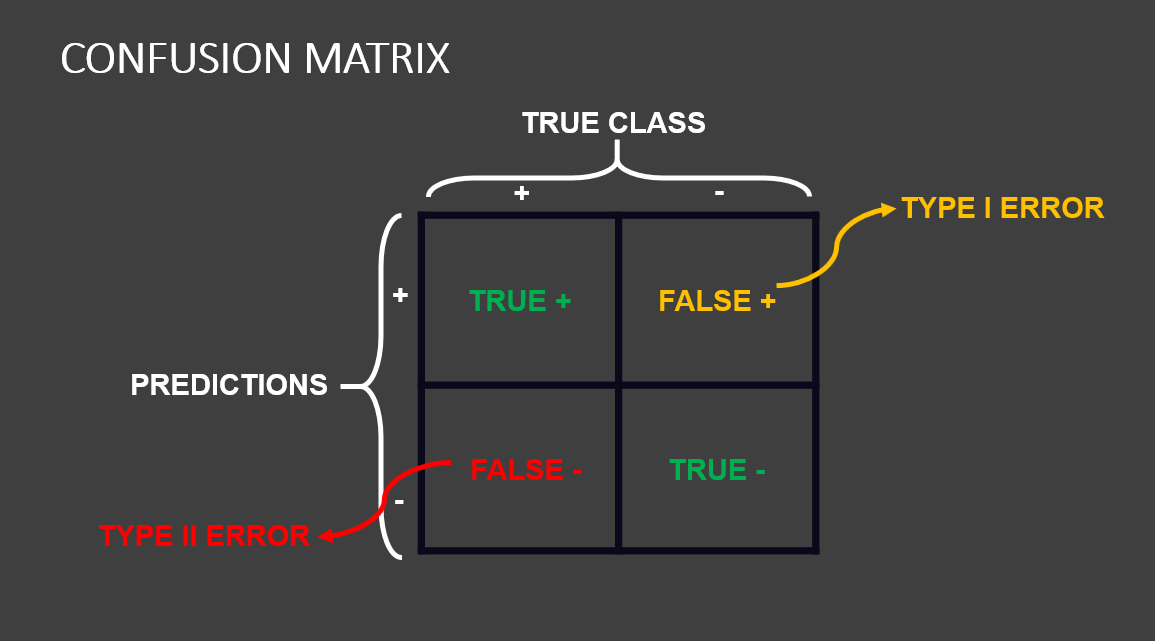

In [24]:
score = CNN.evaluate(x_test_gray_norms, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 6s 14ms/step - loss: 0.7845 - accuracy: 0.8924
Test Accuracy: 0.8923990726470947


## explanation of above code
this code allows you to assess the performance of a trained CNN model on a testing dataset by computing the evaluation metrics and displaying the accuracy value.

**score = CNN.evaluate(X_test_gray_norm, y_test) :** This line computes the evaluation metrics of the trained CNN model on the testing dataset. X_test_gray_norm contains the normalized grayscale images that the model will make predictions on, and y_test contains the corresponding ground truth labels. The evaluate() method returns a list of evaluation metrics, where the first element is the loss value and the second element is the accuracy of the model on the testing dataset. The score variable is assigned to this list.

**print('Test Accuracy: {}'.format(score[1])):** This line prints the accuracy of the trained CNN model on the testing dataset. The accuracy value is obtained from the score variable using indexing.

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Running history.history.keys()** will give you an idea of what metrics were recorded during the training process and what keys you can use to access them.
When you run history.history.keys(), it returns a list of keys that correspond to the different metrics that were recorded during the training process.

some common keys that may appear in history.history.keys() are:
<ol>
    <li>'loss': the training loss at each epoch</li>
    <li>'val_loss': the validation loss at each epoch (if validation data was used during training)</li>
    <li>'accuracy': the training accuracy at each epoch</li>
<li>'val_accuracy': the validation accuracy at each epoch (if validation data was used during training)</li>
</ol>

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

**Explanation of above code**

**accuracy :** The accuracy variable is assigned the values of the 'accuracy' key in the history.history dictionary. This contains a list of the training accuracy at each epoch.

**val_accuracy :** The val_accuracy variable is assigned the values of the 'val_accuracy' key in the history.history dictionary. This contains a list of the validation accuracy at each epoch, if validation data was provided during training.

**loss :** The loss variable is assigned the values of the 'loss' key in the history.history dictionary. This contains a list of the training loss at each epoch.

**val_loss :** The val_loss variable is assigned the values of the 'val_loss' key in the history.history dictionary. This contains a list of the validation loss at each epoch, if validation data was provided during training.

By assigning these values to separate variables, you can analyze and visualize the performance of the model during training and validation, and make improvements to the model accordingly.

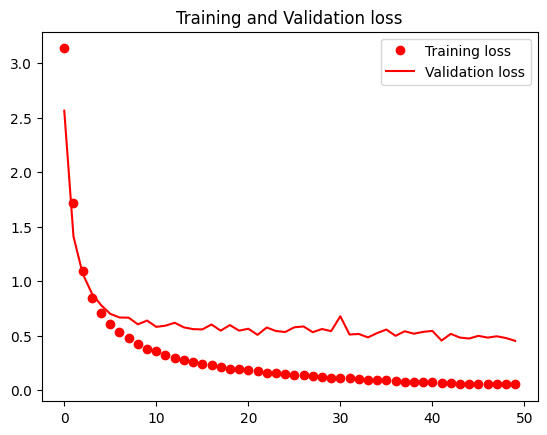

In [32]:
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()  #This displays a legend in the plot  i.e label whether it i ro or r

## explanation of above code
<ul>
    
<li>by plotting the training and validation loss over the course of training and you observe that the validation loss is consistently higher than the training loss, it could be an indication that the model is overfitting to the training data.</li>
<br>
<li>When a model is overfitting, it means that it is memorizing the training data instead of generalizing to new, unseen data. This leads to a gap between the training loss (which measures how well the model fits the training data) and the validation loss (which measures how well the model generalizes to new data).</li>
<br>
<li>If the validation loss is consistently higher than the training loss, it suggests that the model is not generalizing well to new data. In this case, you may want to consider using techniques like regularization, dropout, or early stopping to prevent overfitting.</li>
<br>
<li>However, it's worth noting that it's not always bad if the validation loss is slightly higher than the training loss. Some amount of overfitting is often expected, especially if the model is very complex or if the training data is limited.</li>
</ul>

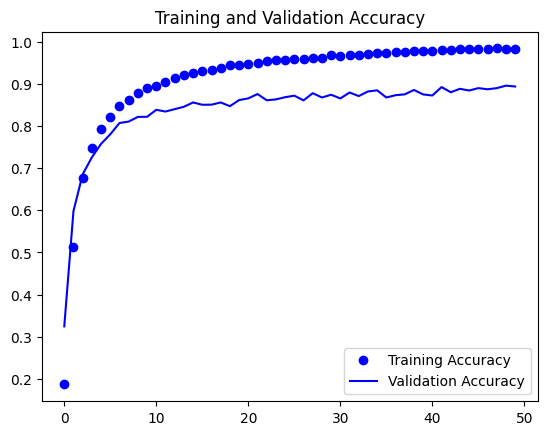

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## explanation of above code
by  plotting the training and validation accuracy over the course of training and I observe that the training accuracy is consistently higher than the validation accuracy, it could be an indication that the model is overfitting to the training data.

and rest of the explanation is same as above the above code

395/395 [==============================] - 3s 7ms/step


<AxesSubplot:>

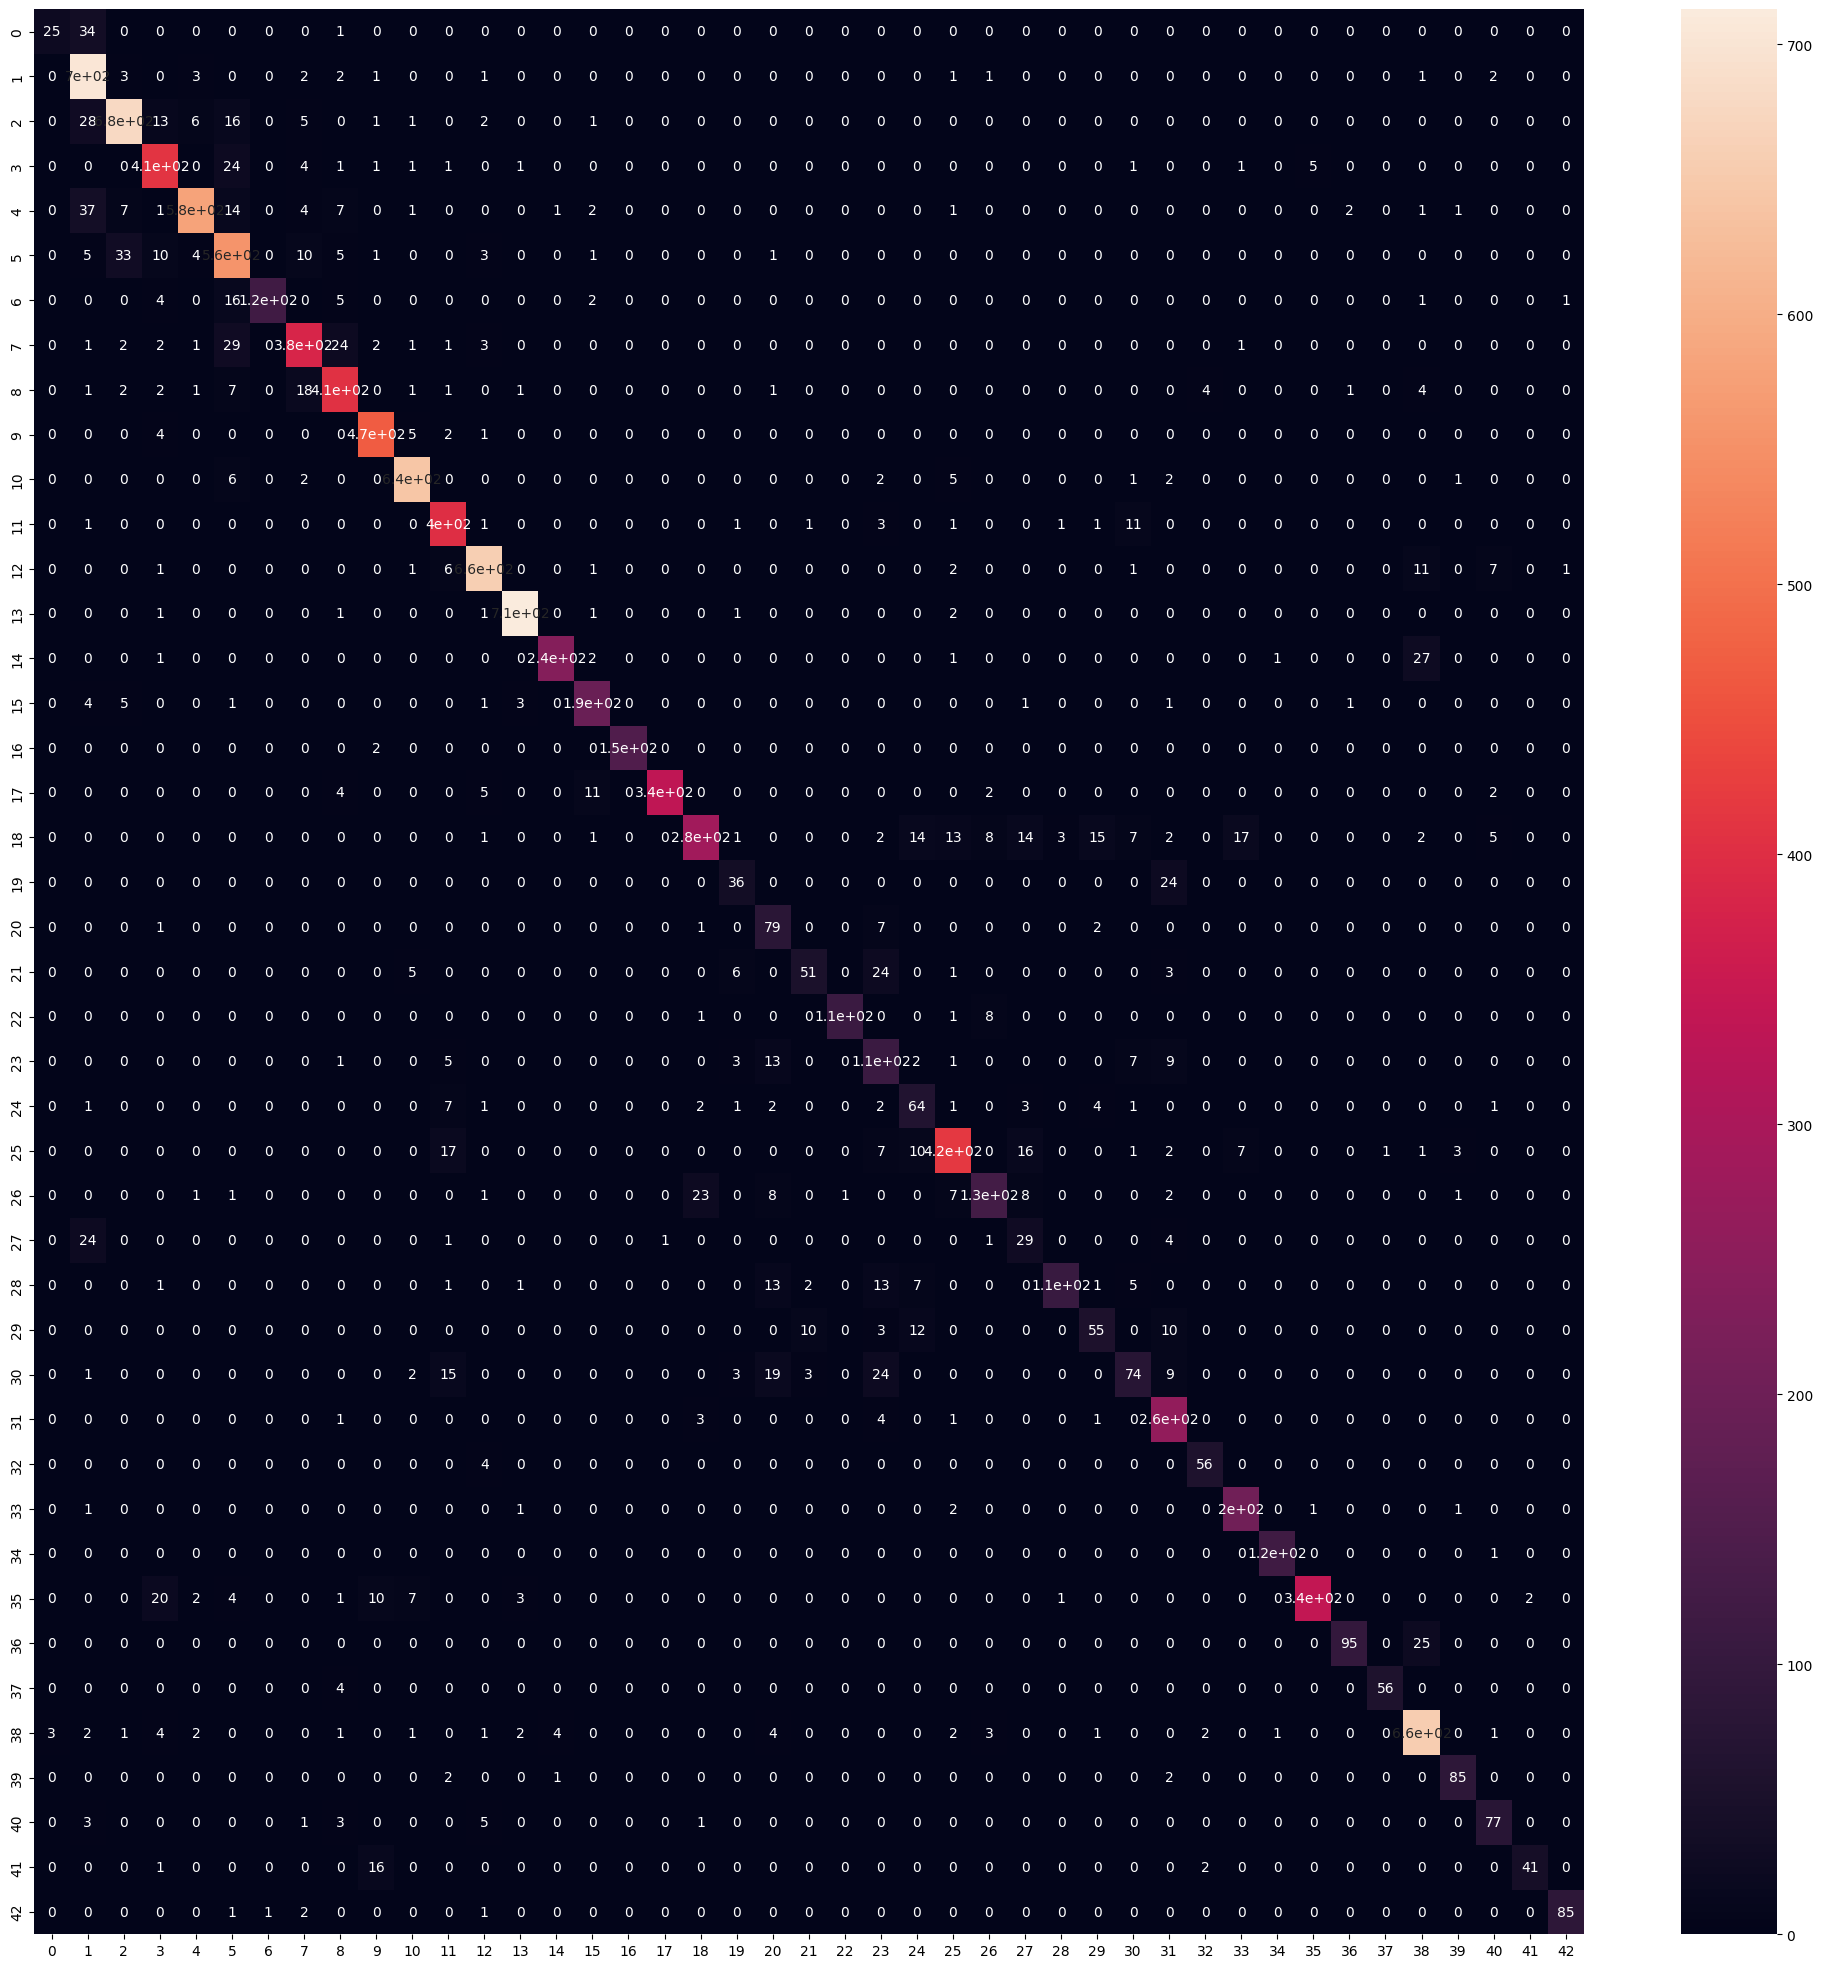

In [54]:
# predicted_classes = CNN.predict_classes(x_test_gray_norms)
# y_true = y_test
y_pred = CNN.predict(x_test_gray_norms)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

**Explanation of above code**

This code uses the confusion_matrix function from the sklearn.metrics module to calculate the confusion matrix between the predicted class labels (predicted_classes) and the true class labels (y_true) for the test set.


The sns.heatmap function from the seaborn library is used to plot the confusion matrix as a heatmap. The annot=True parameter displays the values of the matrix in each cell of the heatmap.

By visualizing the confusion matrix, you can see which classes are being misclassified by the model and where the model is performing well.

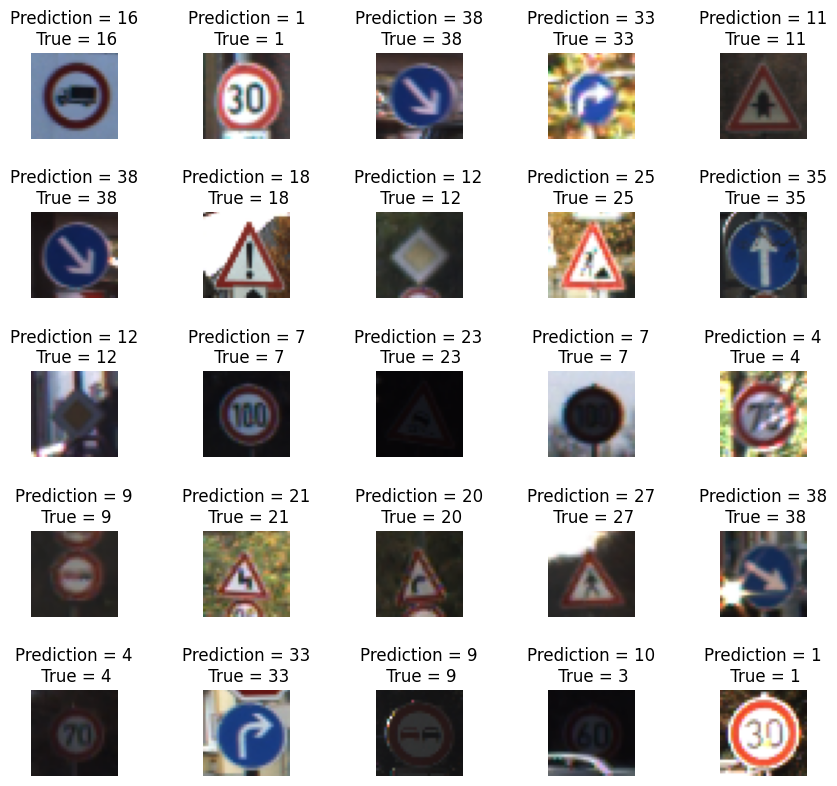

In [57]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (10, 10))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [59]:
CNN.save('my_model.h5')